In [2]:
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import pickle
import cv2


def get_img_res(exp, image_name):
    exps_dir = '/datatmp/Experiments/belbarashy/exps/'
    #exps_dir = 
    imgs_dir = os.path.join(exps_dir, exp+ '/compressed_reconstructed_images')
    img      = cv2.imread(os.path.join(imgs_dir, image_name+'_reconstructed.png'))
    with open(os.path.join(imgs_dir, image_name+'_metrics.pkl'), "rb") as fp:
        metrics = pickle.load(fp)        
    file_size_kb = os.stat(os.path.join(imgs_dir, image_name+'_compressed.bin')).st_size/1000, 'kB'
    orig = cv2.imread(os.path.join(imgs_dir, image_name+'_orig.png'))
    return img, metrics, file_size_kb, orig


In [10]:
def compare(exp1, exp2, image_name):
    crop = [[10,300], [400,200]]  # x,y,w,h
    crop[1][0] += crop[0][0]
    crop[1][1] += crop[0][1]


    img1, metrics1, file_size_kb1, orig = get_img_res(exp1, image_name)
    img2, metrics2, file_size_kb2, orig = get_img_res(exp2, image_name)

    plt.figure(figsize=(18, 7))
    plt.subplot(231)
    plt.title(exp1)
    plt.imshow( img1[crop[0][1]:crop[1][1],crop[0][0]:crop[1][0],::-1] )
    plt.axis('off')
    plt.subplot(232)
    plt.title(exp2)
    plt.imshow( img2[crop[0][1]:crop[1][1],crop[0][0]:crop[1][0],::-1] )
    plt.axis('off')
    plt.subplot(233)
    plt.title('Original idx='+image_name)
    plt.imshow(  orig[crop[0][1]:crop[1][1],crop[0][0]:crop[1][0],::-1])
    plt.axis('off')


    cv2.rectangle(img1, tuple(crop[0]), tuple(crop[1]), (0, 255, 0), 9)
    cv2.rectangle(img2, tuple(crop[0]), tuple(crop[1]), (0, 255, 0), 9)
    cv2.rectangle(orig, tuple(crop[0]), tuple(crop[1]), (0, 255, 0), 9)

    #plt.figure(figsize=(18, 18))
    plt.subplot(234)
    plt.title(exp1+ '\nbpp= ' +str(metrics1['bpp'])[:4]
                  + '   mse= ' +str(metrics1['mse'])[:4]
                  + '   msssim= ' +str(metrics1['msssim'])[:4])
    plt.imshow( img1[:,:,::-1] )
    plt.axis('off')
    plt.subplot(235)
    plt.title(exp2+ '\nbpp= ' +str(metrics2['bpp'])[:4]
                  + '   mse= ' +str(metrics2['mse'])[:4]
                  + '   msssim= ' +str(metrics2['msssim'])[:4])
    plt.imshow( img2[:,:,::-1])
    plt.axis('off')
    plt.subplot(236)
    plt.title('Original idx='+image_name)
    plt.imshow( orig[:,:,::-1])
    plt.axis('off')



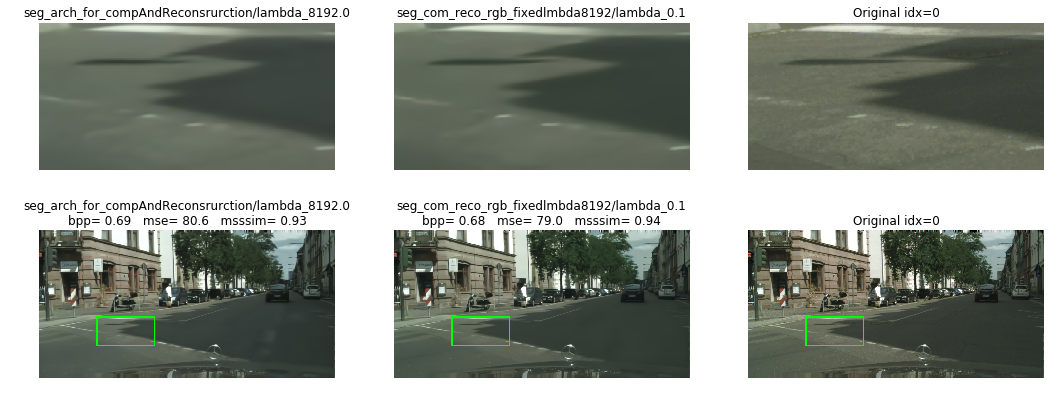

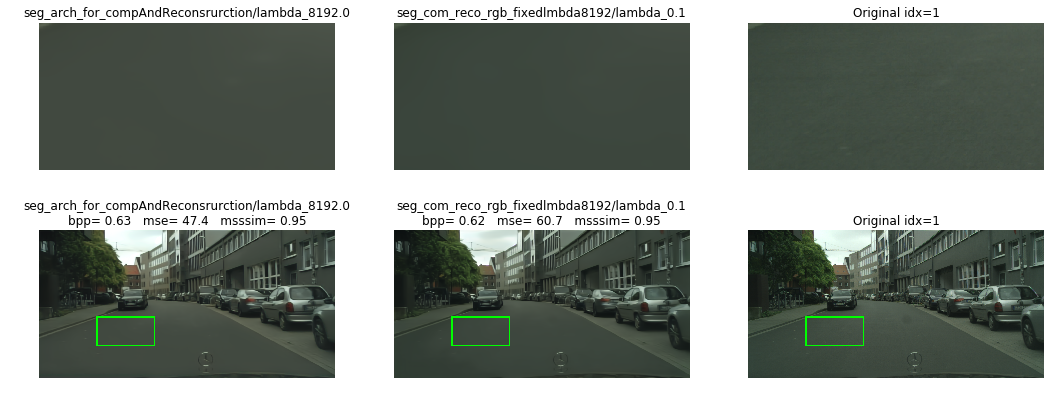

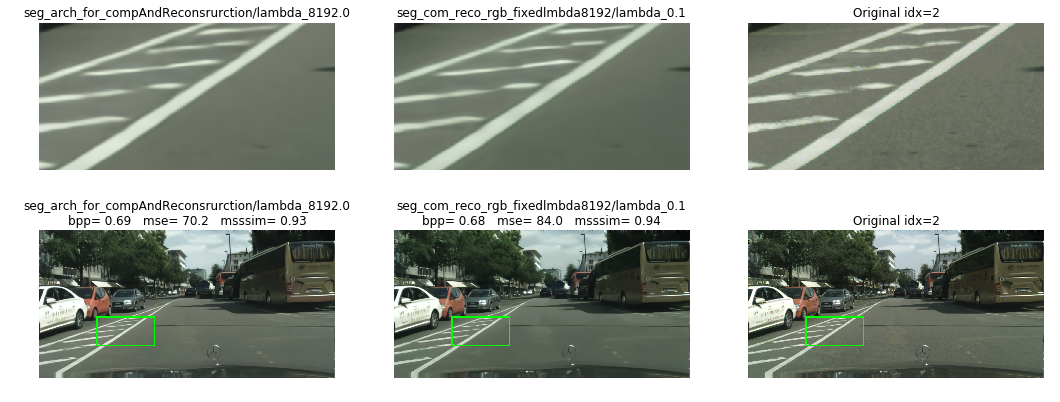

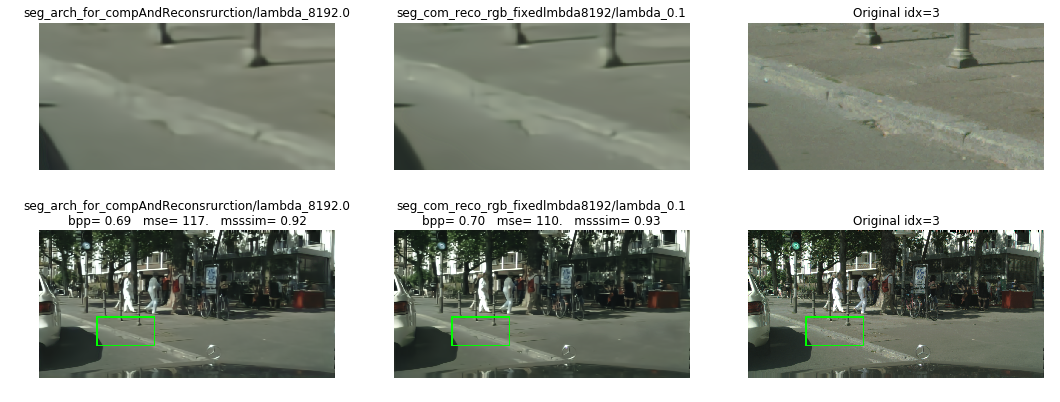

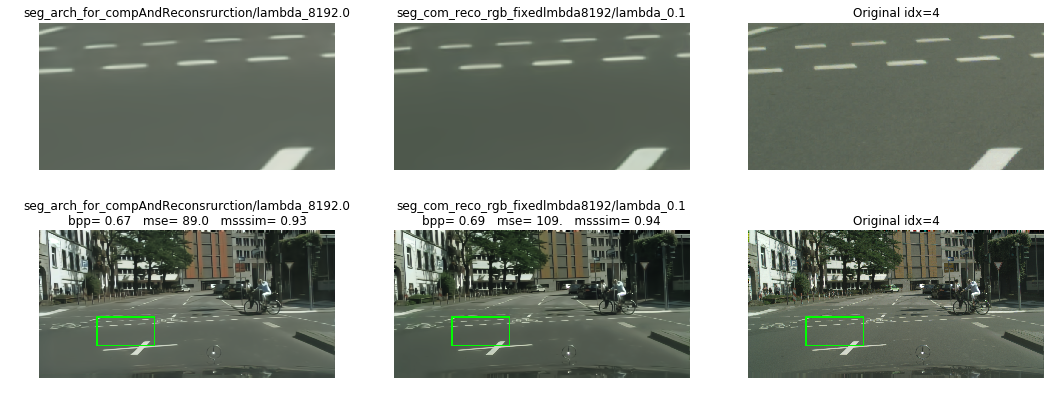

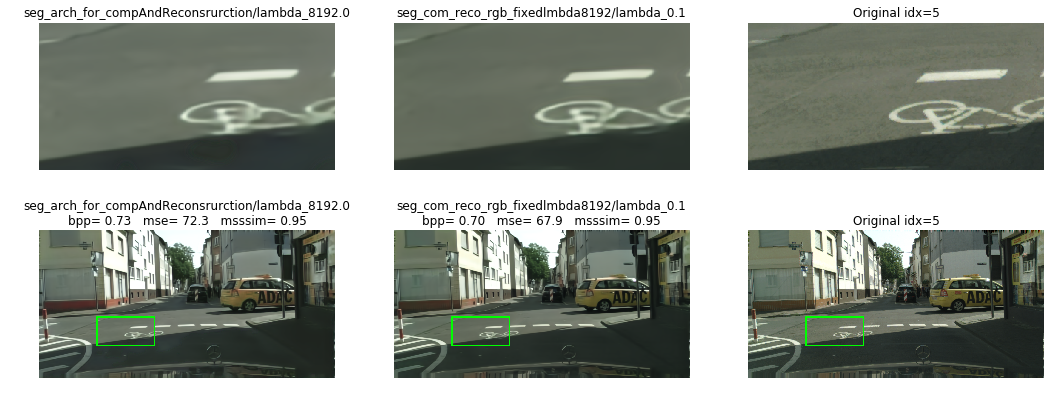

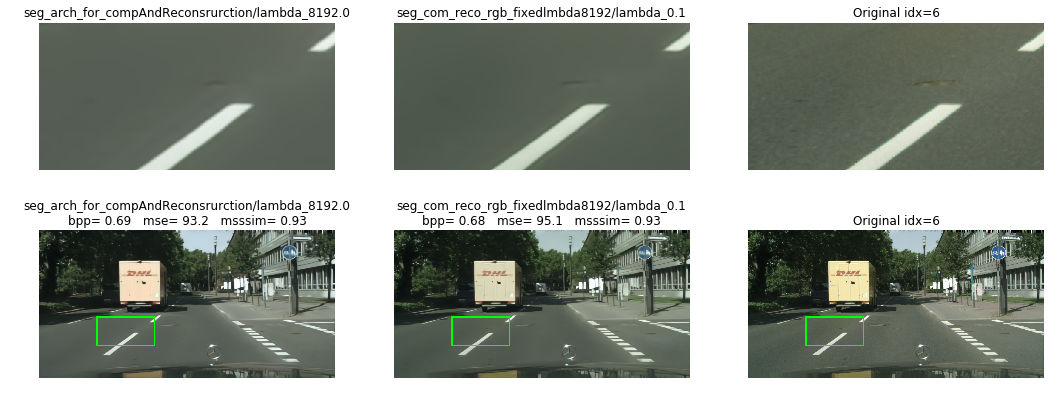

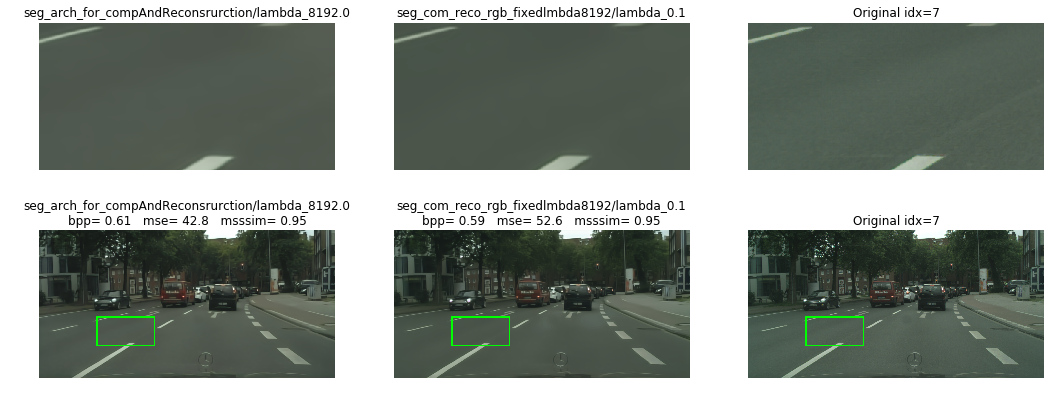

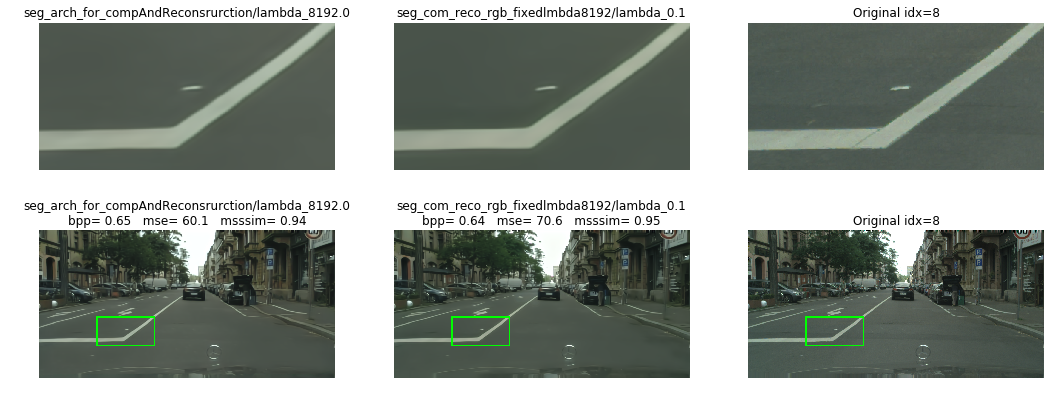

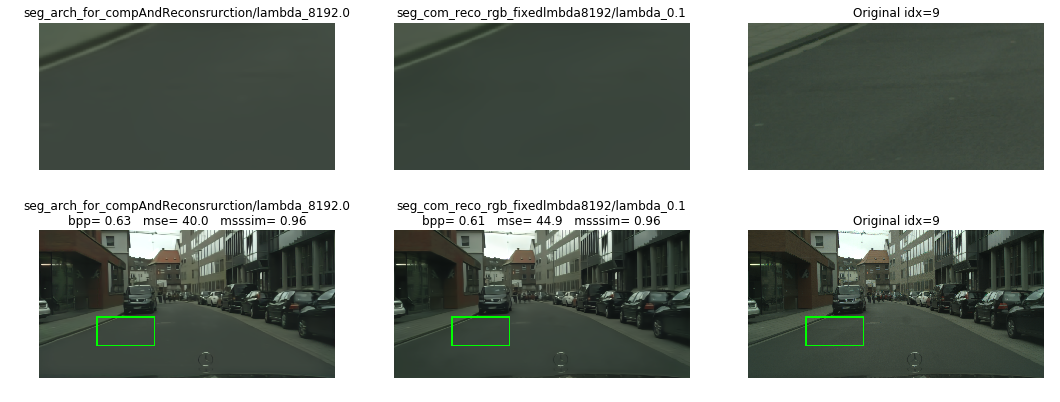

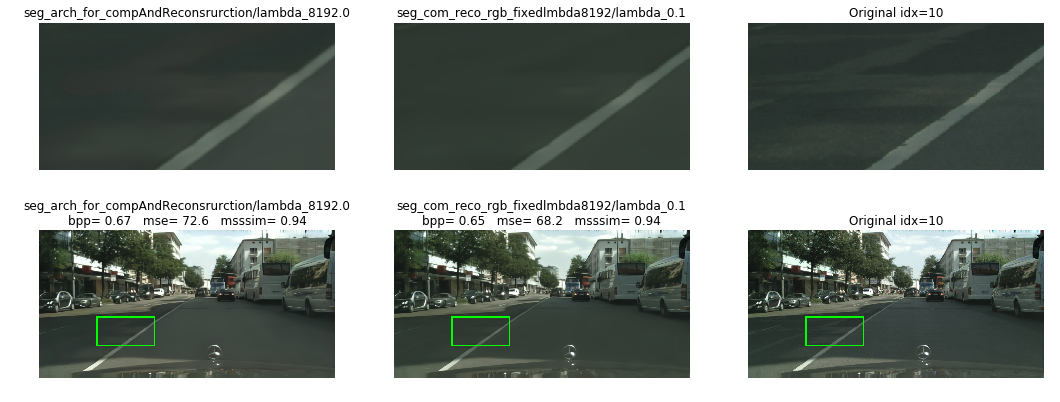

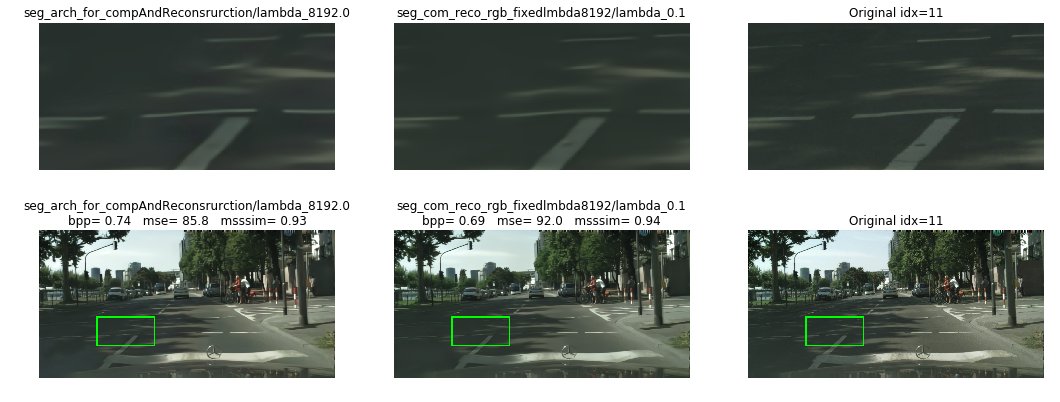

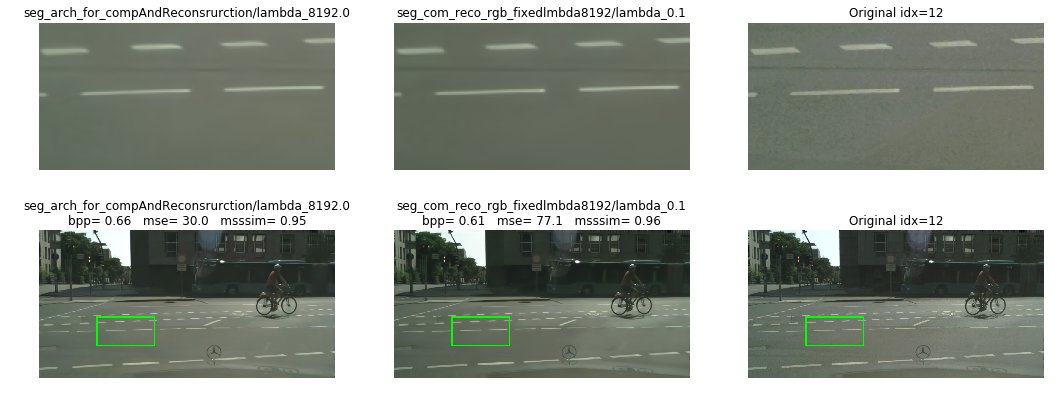

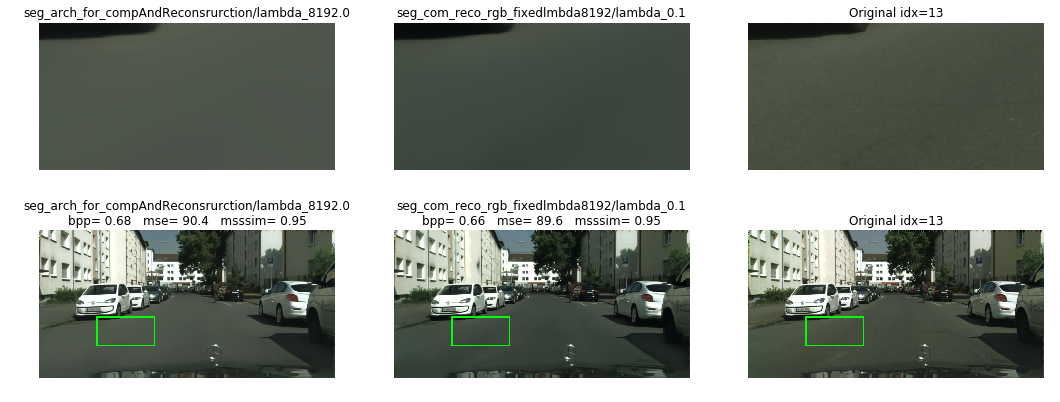

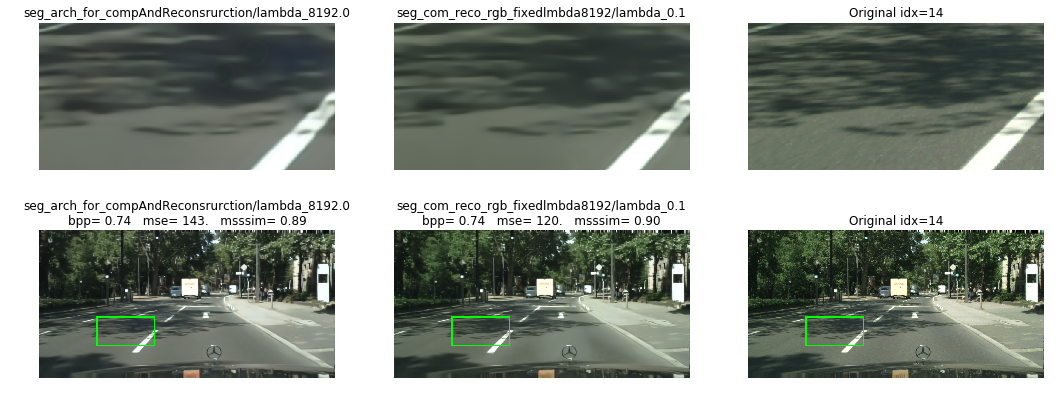

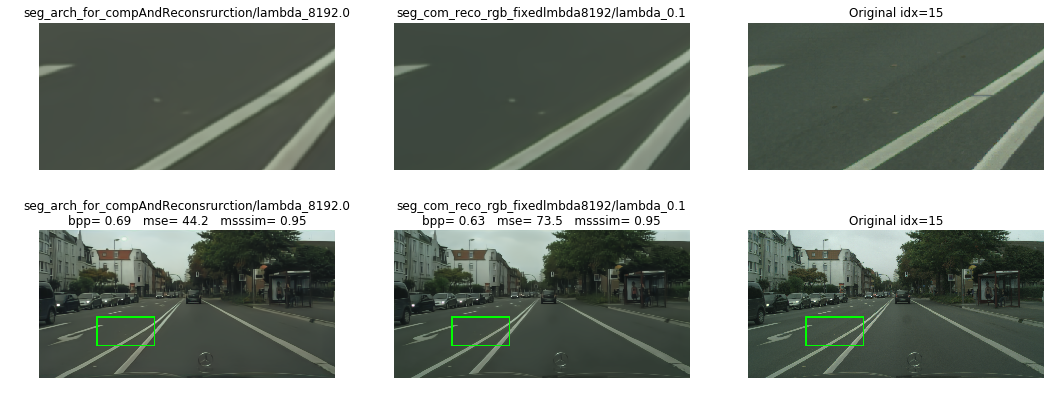

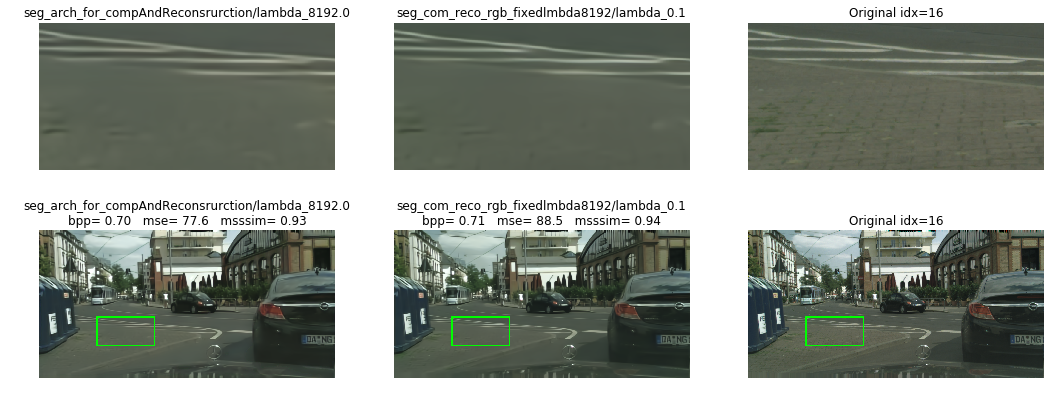

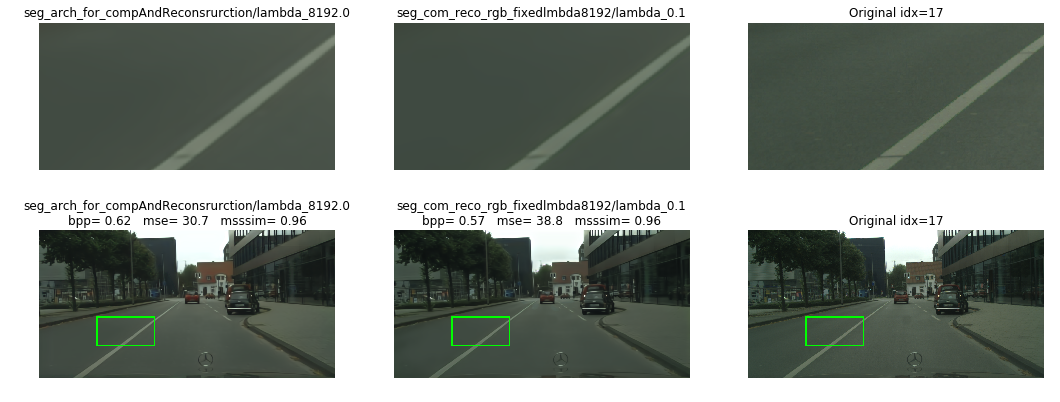

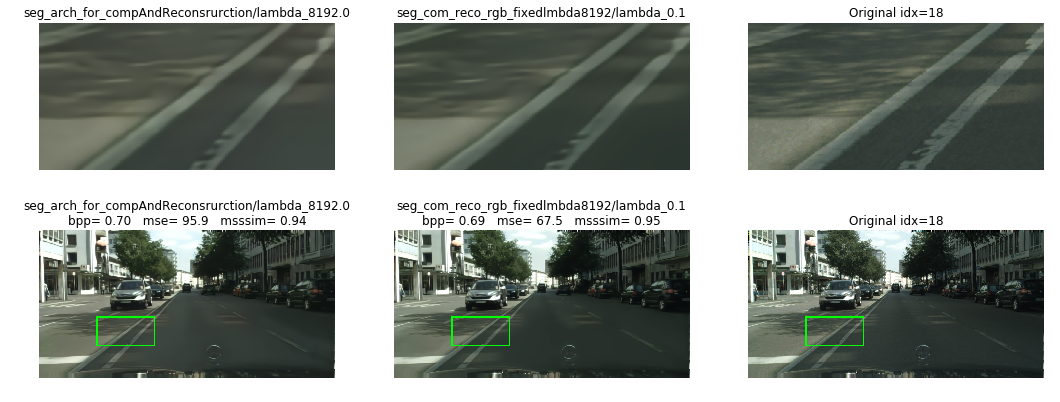

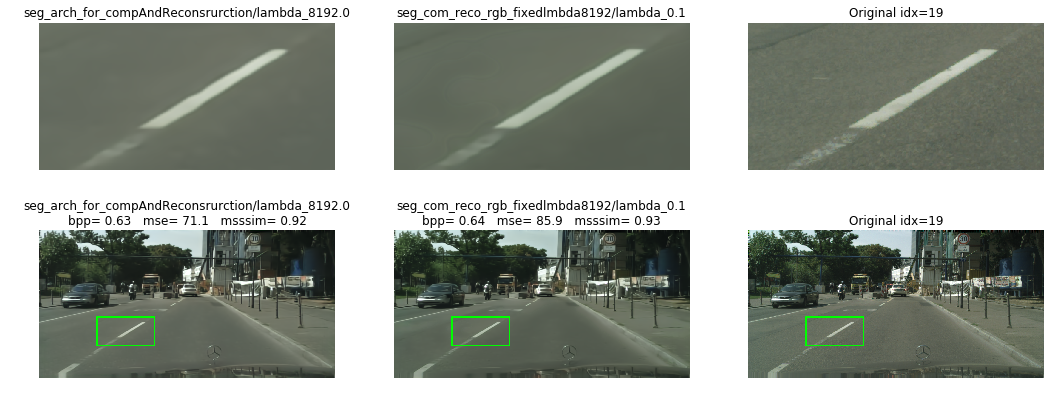

In [11]:
exp2 = 'seg_com_reco_rgb_fixedlmbda8192/lambda_0.1'
exp1 = 'seg_arch_for_compAndReconsrurction/lambda_8192.0'
image_name ='14'
for i in range(20):
    compare(exp1, exp2, image_name = str(i))